In [131]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [107]:
x_train = pd.read_csv('./x_train.csv', index_col='ID')
y_train = pd.read_csv('./y_train.csv', index_col='ID')
train = pd.concat([x_train, y_train], axis=1)
test = pd.read_csv('./x_test.csv', index_col='ID')
print(train.columns)
train.head()

Index(['DATE', 'STOCK', 'INDUSTRY', 'INDUSTRY_GROUP', 'SECTOR', 'SUB_INDUSTRY',
       'RET_1', 'VOLUME_1', 'RET_2', 'VOLUME_2', 'RET_3', 'VOLUME_3', 'RET_4',
       'VOLUME_4', 'RET_5', 'VOLUME_5', 'RET_6', 'VOLUME_6', 'RET_7',
       'VOLUME_7', 'RET_8', 'VOLUME_8', 'RET_9', 'VOLUME_9', 'RET_10',
       'VOLUME_10', 'RET_11', 'VOLUME_11', 'RET_12', 'VOLUME_12', 'RET_13',
       'VOLUME_13', 'RET_14', 'VOLUME_14', 'RET_15', 'VOLUME_15', 'RET_16',
       'VOLUME_16', 'RET_17', 'VOLUME_17', 'RET_18', 'VOLUME_18', 'RET_19',
       'VOLUME_19', 'RET_20', 'VOLUME_20', 'RET'],
      dtype='object')


,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,...,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20,RET
ID,,,,,,,,,,,,,,,,,,,,,
0,0,2,18,5,3,44,-0.015748,0.147931,-0.015504,0.179183,...,0.630899,0.003254,-0.379412,0.008752,-0.110597,-0.012959,0.174521,-0.002155,-0.000937,True
1,0,3,43,15,6,104,0.003984,NaN,-0.090580,NaN,...,NaN,0.003774,NaN,-0.018518,NaN,-0.028777,NaN,-0.034722,NaN,True
2,0,4,57,20,8,142,0.000440,-0.096282,-0.058896,0.084771,...,-0.010336,-0.017612,-0.354333,-0.006562,-0.519391,-0.012101,-0.356157,-0.006867,-0.308868,False
3,0,8,1,1,1,2,0.031298,-0.429540,0.007756,-0.089919,...,0.012105,0.033824,-0.290178,-0.001468,-0.663834,-0.013520,-0.562126,-0.036745,-0.631458,False
4,0,14,36,12,5,92,0.027273,-0.847155,-0.039302,-0.943033,...,-0.277083,-0.012659,0.139086,0.004237,-0.017547,0.004256,0.579510,-0.040817,0.802806,False


# SUB INDUSTRY ⊂ INDUSTRY ⊂ INDUSTRY_GROUP ⊂ SECTOR 

In [97]:
train.describe()

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,...,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
count,418595.000000,418595.000000,418595.000000,418595.000000,418595.000000,418595.000000,416236.000000,353570.000000,416130.000000,352209.000000,...,413315.000000,351333.000000,413294.000000,356281.000000,413288.000000,351009.000000,413282.000000,351266.000000,413254.000000,350738.000000
mean,108.659002,3373.567833,37.176020,12.697959,5.483845,90.391663,0.001383,-0.071502,0.000973,-0.075230,...,0.001074,-0.076018,0.001642,-0.087854,0.001131,-0.076147,-0.000798,-0.076496,-0.000027,-0.076337
std,61.891642,1533.157749,19.706505,7.231701,2.410113,47.491157,0.031311,3.038658,0.030987,2.635549,...,0.029538,2.185741,0.031914,2.094459,0.031435,2.423121,0.030738,2.229668,0.033347,2.721355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.845324,-2.434414,-0.770751,-3.007262,...,-0.765478,-5.600056,-0.825014,-4.610393,-0.876157,-4.167784,-0.880000,-2.341887,-0.785714,-2.768928
25%,56.000000,2478.000000,22.000000,6.000000,4.000000,49.000000,-0.010970,-0.555394,-0.011312,-0.540629,...,-0.010527,-0.533574,-0.011331,-0.552613,-0.010949,-0.539491,-0.012139,-0.527846,-0.011682,-0.542790
50%,104.000000,3560.000000,43.000000,15.000000,6.000000,104.000000,0.000637,-0.282609,0.000401,-0.278437,...,0.000530,-0.272271,0.000433,-0.285480,0.000000,-0.281753,0.000000,-0.277674,0.000000,-0.283405
75%,161.000000,4606.000000,53.000000,19.000000,7.000000,128.000000,0.012950,0.047759,0.012326,0.041177,...,0.012084,0.029131,0.012862,0.027272,0.012180,0.027639,0.011236,0.030201,0.011712,0.035795
max,223.000000,5716.000000,74.000000,26.000000,11.000000,182.000000,1.444990,1232.174009,1.427746,632.268279,...,1.028902,355.613431,1.707736,408.771698,6.000004,788.461460,2.954430,631.249564,7.208859,932.939205


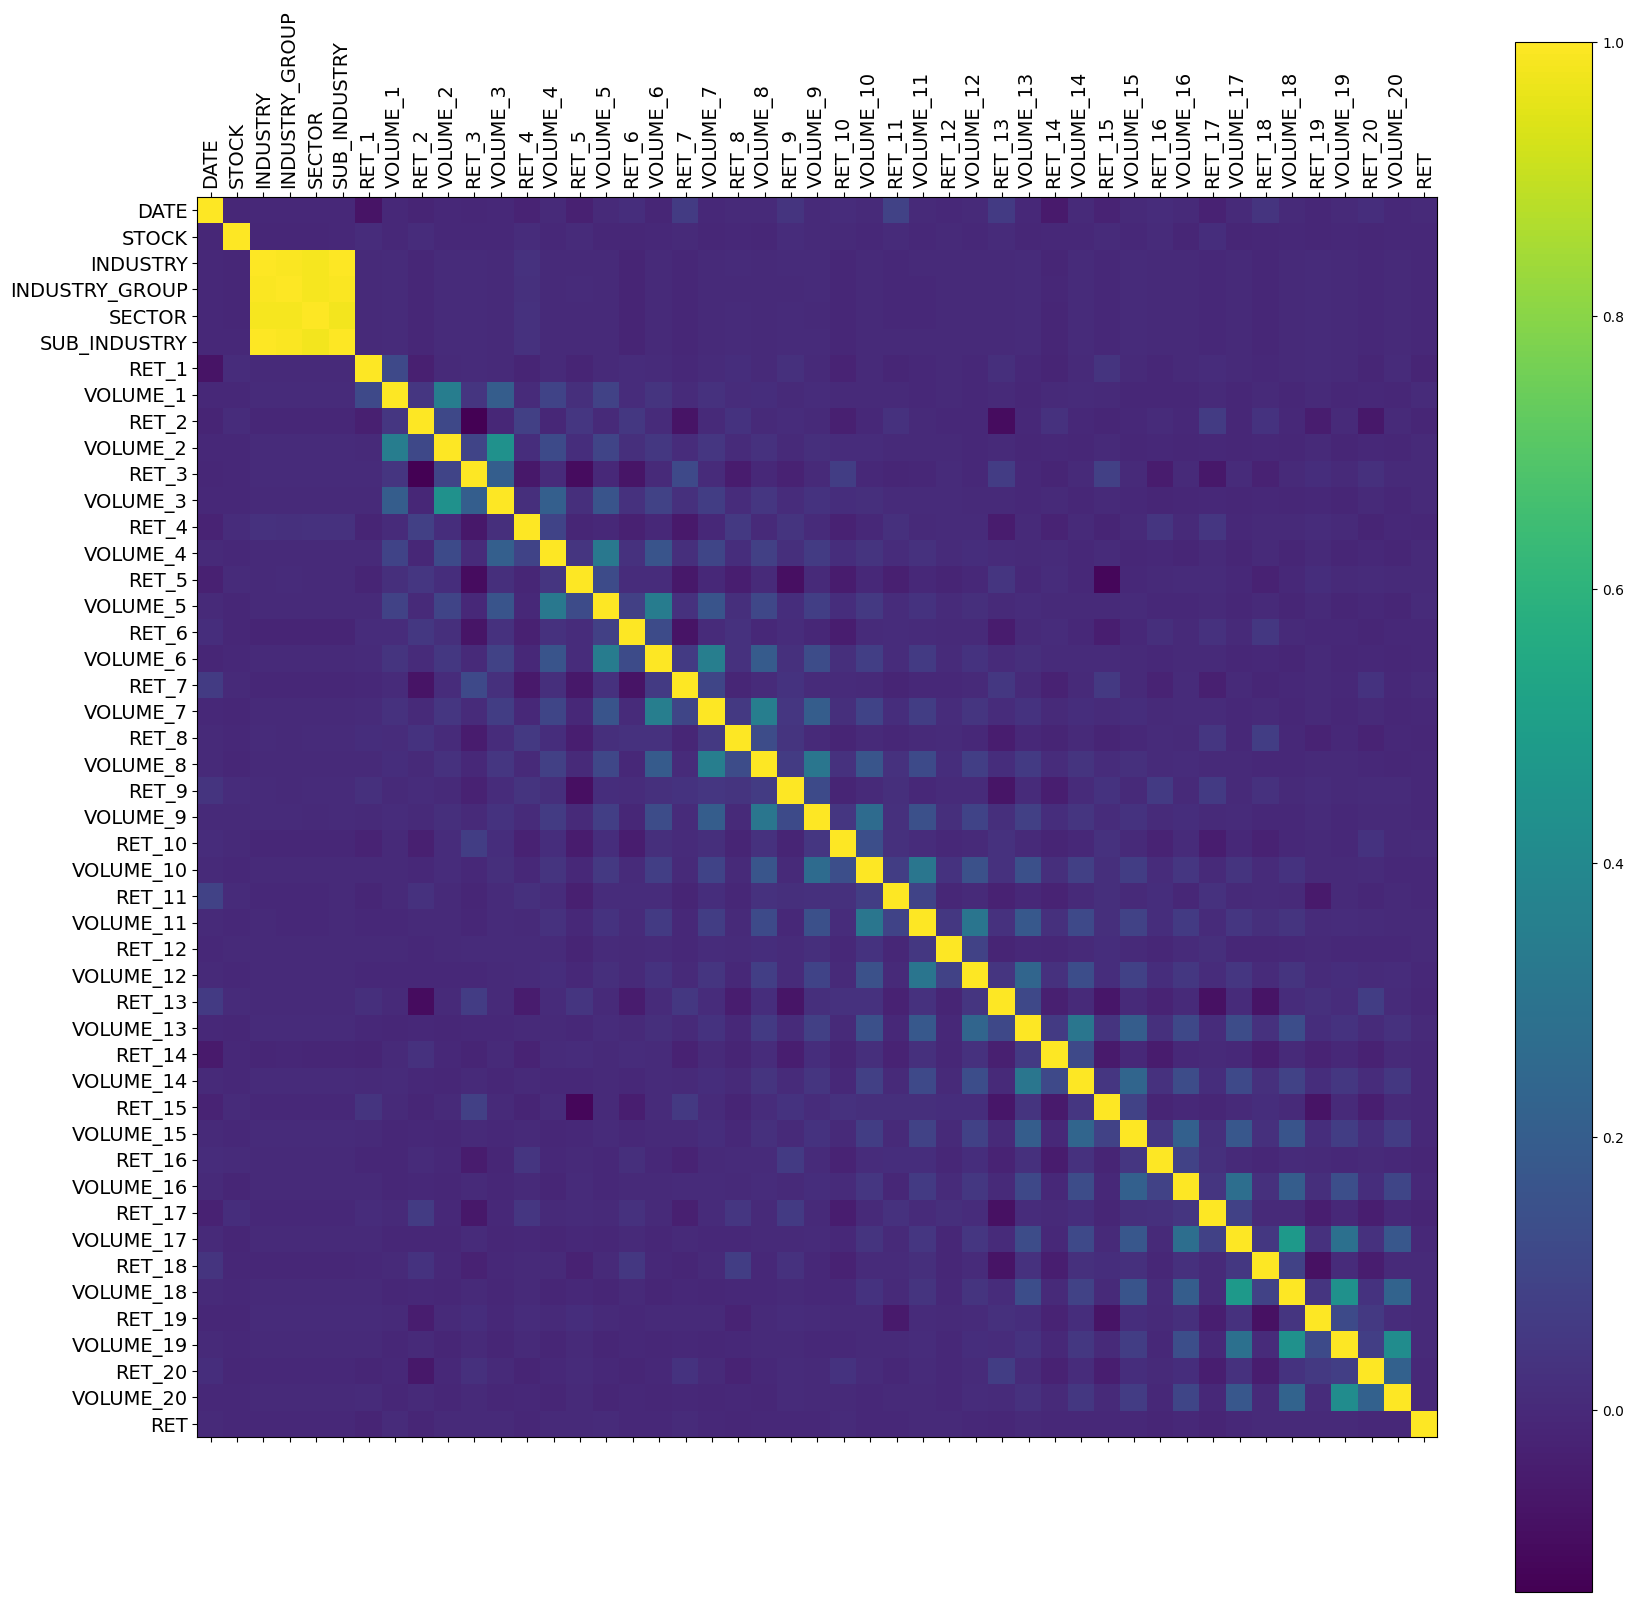

In [84]:
fig = plt.figure(figsize=(20,20))
plt.matshow(train.corr(), fignum=fig.number)
plt.xticks(range(train.shape[1]), train.columns, rotation=90, fontsize=14)
plt.yticks(range(train.shape[1]), train.columns, fontsize=14)
plt.colorbar()
plt.show()

# Volume du jour davant est corrélé avec celui du jour d'après intéréssant 

In [ ]:
#jenleve les ligne sou ya plus de la moitie des features vol+return qui sont nan tas capté
to_drop = [f'RET_{day}' for day in range(6,21)]
to_drop += [f'VOLUME_{day}' for day in range(6,21)]
cleaned_train = train.drop(columns= to_drop)
cleaned_train.isna().sum(axis = 0)/len(cleaned_train)*100 # percentage of nan values per feature (axis=0 : each nbr of nan for each features)

DATE               0.000000
STOCK              0.000000
INDUSTRY           0.000000
INDUSTRY_GROUP     0.000000
SECTOR             0.000000
SUB_INDUSTRY       0.000000
RET_1              0.563552
VOLUME_1          15.534108
RET_2              0.588875
VOLUME_2          15.859243
RET_3              0.598908
VOLUME_3          16.201579
RET_4              0.607747
VOLUME_4          16.960785
RET_5              0.617303
VOLUME_5          17.843739
RET                0.000000
dtype: float64

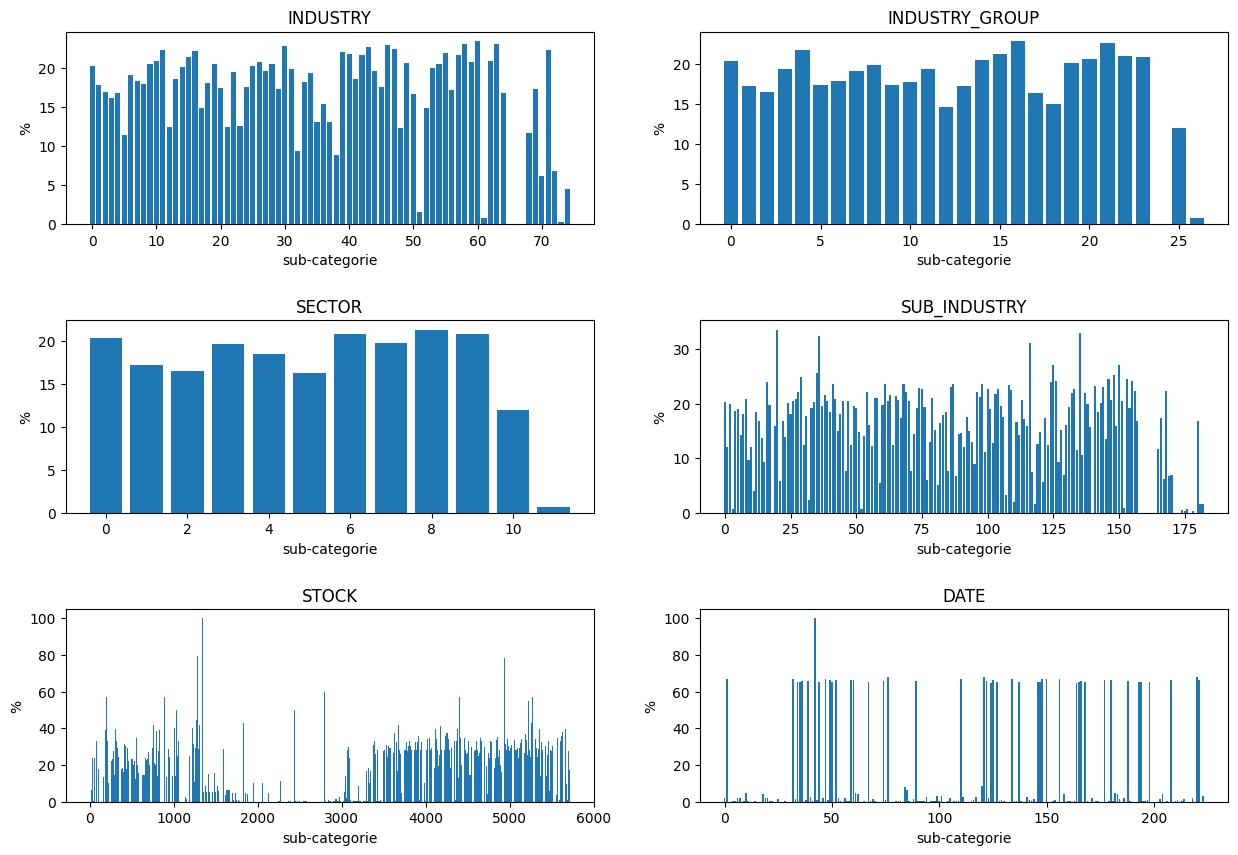

In [ ]:
#ptits plot pour voir le pourcentage de missing value par unique value dans les sub categorrie. en moyenne 20% est missing dans chaque
#Cest asssez consequent donc on va etudier ca pour 
#1ER TEMPS SUPPRIMER LES LIGNES VRAIMENT LEGERES
#2EME TEMPS REPLACE LES NAN MINORITAIRES PAR UNE VALUER COHERENTE

plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
for i,categorie in enumerate(['INDUSTRY', 'INDUSTRY_GROUP', 'SECTOR', 'SUB_INDUSTRY', 'STOCK', 'DATE']): 
    plt.subplot(3,2,i+1)
    plt.title(categorie)
    X_absciss = cleaned_train[categorie].sort_values().unique()

    unique_Y_values = cleaned_train[categorie].sort_values().unique()
    Y_absciss = [(cleaned_train[cleaned_train[categorie]==sub_categorie].isna().sum(axis=1)>0).sum()/len(cleaned_train[cleaned_train[categorie]==sub_categorie])*100 for sub_categorie in unique_Y_values]
    
    plt.bar(X_absciss,Y_absciss)
    plt.xlabel('sub-categorie')
    plt.ylabel('%')
plt.show()

In [ ]:
# On check sil existe des ligens qui contienne la moitie ou plus de nan dans les features volume et returns
# on a vuau debut que dans sector, industry, industry group, sub industry il y avait auvune missing values donc on va pas soccuper de ca

ret_features = [f'RET_{day}' for day in range(1,6)]
vol_features = [f'VOLUME_{day}' for day in range(1,6)]
features = vol_features + ret_features

to_drop = cleaned_train[cleaned_train[features].isna().sum(axis=1) >= len(features)*0.5][features].index
print(len(to_drop))

cleaned_train.drop(index = to_drop, axis=0, inplace = True)

59442


In [58]:
cleaned_train.isna().sum(axis = 0)/len(cleaned_train)*100 # percentage of nan values per feature (axis=0 : each nbr of nan for each features)

DATE              0.000000
STOCK             0.000000
INDUSTRY          0.000000
INDUSTRY_GROUP    0.000000
SECTOR            0.000000
SUB_INDUSTRY      0.000000
RET_1             0.000000
VOLUME_1          1.554491
RET_2             0.000000
VOLUME_2          1.933438
RET_3             0.000000
VOLUME_3          2.332432
RET_4             0.000000
VOLUME_4          3.218406
RET_5             0.000000
VOLUME_5          4.248607
RET               0.000000
dtype: float64

In [61]:
volume = pd.DataFrame(columns=['day', 'ret_mean', 'ret_median', 'ret_std', 'vol_mean', 'vol_median', 'vol_std'])
for day in range(1,6):
    volume.loc[day] =[day, cleaned_train[f'RET_{day}'].mean(), cleaned_train[f'RET_{day}'].median(), cleaned_train[f'RET_{day}'].std(), 
                      cleaned_train[f'VOLUME_{day}'].mean(), cleaned_train[f'VOLUME_{day}'].median(), cleaned_train[f'VOLUME_{day}'].std()]
volume

,day,ret_mean,ret_median,ret_std,vol_mean,vol_median,vol_std
1,1.0,0.001815,0.000887,0.029865,-0.071502,-0.282609,3.038658
2,2.0,0.001346,0.000847,0.030131,-0.075230,-0.278437,2.635549
3,3.0,0.002738,0.001341,0.030862,-0.097235,-0.278277,2.490831
4,4.0,-0.001049,-0.000624,0.029742,-0.088985,-0.275435,1.730780
5,5.0,0.000939,0.000000,0.031203,-0.092159,-0.281231,1.848985


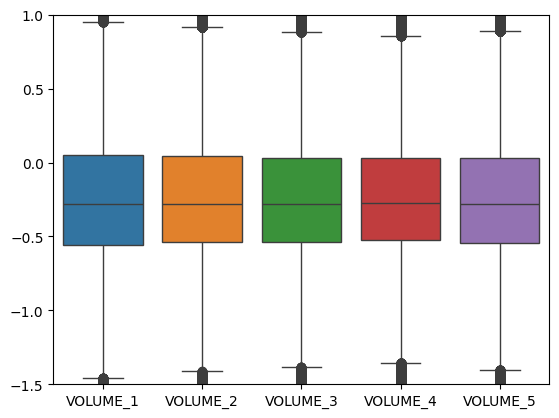

In [67]:
sns.boxplot(cleaned_train[[f'VOLUME_{day}' for day in range(1,6)]])
plt.ylim((-1.5,1))
plt.show()

il y a des outliers donc la mediane est plus interessant pou rrempalcer nan que la moyenne car plus robuste

In [98]:
per_row_daily_median_volume = cleaned_train.groupby("DATE")[vol_features].transform("median")
print(per_row_daily_median_volume)
# 3) Remplacer les NaN par la médiane du même jour (colonne par colonne)
cleaned_train[vol_features] = cleaned_train[vol_features].fillna(per_row_daily_median_volume)

        VOLUME_1  VOLUME_2  VOLUME_3  VOLUME_4  VOLUME_5
ID                                                      
0      -0.232276 -0.322270 -0.343676 -0.352530 -0.382487
2      -0.232276 -0.322270 -0.343676 -0.352530 -0.382487
3      -0.232276 -0.322270 -0.343676 -0.352530 -0.382487
4      -0.232276 -0.322270 -0.343676 -0.352530 -0.382487
5      -0.232276 -0.322270 -0.343676 -0.352530 -0.382487
...          ...       ...       ...       ...       ...
418590 -0.385313 -0.387235 -0.378179 -0.271173 -0.282324
418591 -0.385313 -0.387235 -0.378179 -0.271173 -0.282324
418592 -0.385313 -0.387235 -0.378179 -0.271173 -0.282324
418593 -0.385313 -0.387235 -0.378179 -0.271173 -0.282324
418594 -0.385313 -0.387235 -0.378179 -0.271173 -0.282324

[359153 rows x 5 columns]


In [99]:
#jenleve les ligne sou ya plus de la moitie des features vol+return qui sont nan tas capté
cleaned_train.isna().sum(axis = 0)/len(cleaned_train)*100 # percentage of nan values per feature (axis=0 : each nbr of nan for each features)

DATE              0.0
STOCK             0.0
INDUSTRY          0.0
INDUSTRY_GROUP    0.0
SECTOR            0.0
SUB_INDUSTRY      0.0
RET_1             0.0
VOLUME_1          0.0
RET_2             0.0
VOLUME_2          0.0
RET_3             0.0
VOLUME_3          0.0
RET_4             0.0
VOLUME_4          0.0
RET_5             0.0
VOLUME_5          0.0
RET               0.0
dtype: float64

ALRIGHT les missings values bien remplacées

# On veut gerer les outliers mtn 

Nb lignes supprimées IQR : 89130
Nb lignes supprimées IsolationForest : 17958


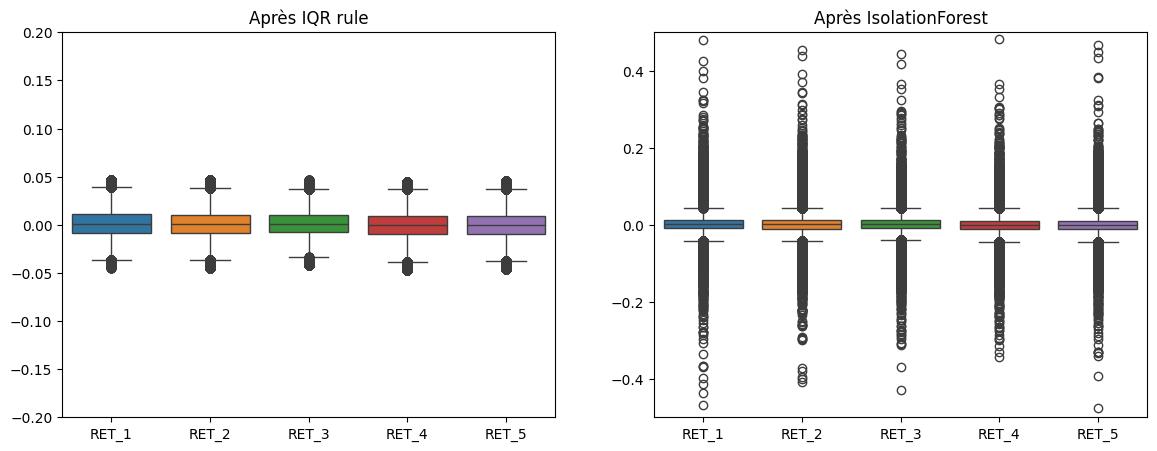

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# --- Sélection des features ---
features = ret_features + vol_features
X = cleaned_train[ret_features]

# --- Méthode 1 : IQR ---
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
mask_iqr = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
cleaned_iqr = cleaned_train[mask_iqr]

# --- Méthode 2 : IsolationForest ---
iso = IsolationForest(contamination=0.05, random_state=42)
y_pred_iso = iso.fit_predict(X)
cleaned_iso = cleaned_train[y_pred_iso == 1]  # 1 = normal, -1 = outlier

print(f"Nb lignes supprimées IQR : {len(cleaned_train) - len(cleaned_iqr)}")
print(f"Nb lignes supprimées IsolationForest : {len(cleaned_train) - len(cleaned_iso)}")

# --- Plot côte à côte ---
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(cleaned_iqr[ret_features])
plt.title("Après IQR rule")
plt.ylim((-0.2, 0.2))

plt.subplot(1, 2, 2)
sns.boxplot(cleaned_iso[ret_features])
plt.title("Après IsolationForest")
plt.ylim((-0.5, 0.5))

plt.show()


In [ ]:
print(cleaned_iso.head())
print(cleaned_iso.drop(columns = ["outlier_iso","outlier_lof"]).head())
print(len(cleaned_iso))
print(len(cleaned_iqr))

    DATE  STOCK  INDUSTRY  INDUSTRY_GROUP  SECTOR  SUB_INDUSTRY     RET_1  \
ID                                                                          
0      0      2        18               5       3            44 -0.015748   
2      0      4        57              20       8           142  0.000440   
3      0      8         1               1       1             2  0.031298   
4      0     14        36              12       5            92  0.027273   
5      0     23        37              12       5            94  0.010938   

    VOLUME_1     RET_2  VOLUME_2     RET_3  VOLUME_3     RET_4  VOLUME_4  \
ID                                                                         
0   0.147931 -0.015504  0.179183  0.010972  0.033832 -0.014672 -0.362868   
2  -0.096282 -0.058896  0.084771 -0.009042 -0.298777  0.024852 -0.157421   
3  -0.429540  0.007756 -0.089919 -0.004632 -0.639737 -0.019677 -0.940163   
4  -0.847155 -0.039302 -0.943033  0.000000 -1.180629  0.000000 -1.313896   
5  -

# DATset Balance

In [127]:
print(cleaned_train['RET'].value_counts(normalize=True)*100)
print(cleaned_iso['RET'].value_counts(normalize=True)*100)
print(cleaned_iqr['RET'].value_counts(normalize=True)*100)

RET
False    50.093414
True     49.906586
Name: proportion, dtype: float64
RET
False    50.079573
True     49.920427
Name: proportion, dtype: float64
RET
True     50.34423
False    49.65577
Name: proportion, dtype: float64


# creation de nouvelles features 

In [160]:
# Feature engineering
new_features = []
train=cleaned_iqr

# Conditional aggregated features
shifts = [1,2,3]  # Choose some different shifts
statistics = ['mean','sum']  # the type of stat
gb_features = ['SECTOR', 'DATE','INDUSTRY_GROUP']
target_featureS = ['RET','VOLUME']
tmp_name = '_'.join(gb_features)
for shift in shifts:
    for target_feature in target_featureS :
        for stat in statistics:
            name = f'{target_feature}_{shift}_{tmp_name}_{stat}'
            feat = f'{target_feature}_{shift}'
            new_features.append(name)
            for data in [train, test]:
                data[name] = data.groupby(gb_features)[feat].transform(stat)

C:\Users\phpor\AppData\Local\Temp\ipykernel_6648\895382065.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name] = data.groupby(gb_features)[feat].transform(stat)
C:\Users\phpor\AppData\Local\Temp\ipykernel_6648\895382065.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name] = data.groupby(gb_features)[feat].transform(stat)
C:\Users\phpor\AppData\Local\Temp\ipykernel_6648\895382065.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

Baseline Model

In [161]:
target = 'RET'

n_shifts = 5  # If you don't want all the shifts to reduce noise
features = ['RET_%d' % (i + 1) for i in range(n_shifts)]
features += ['VOLUME_%d' % (i + 1) for i in range(n_shifts)]
features += new_features  # The conditional features
train[features].head()

,RET_1,RET_2,RET_3,RET_4,RET_5,VOLUME_1,VOLUME_2,VOLUME_3,VOLUME_4,VOLUME_5,...,VOLUME_1_SECTOR_DATE_INDUSTRY_GROUP_mean,VOLUME_1_SECTOR_DATE_INDUSTRY_GROUP_sum,RET_2_SECTOR_DATE_INDUSTRY_GROUP_mean,RET_2_SECTOR_DATE_INDUSTRY_GROUP_sum,VOLUME_2_SECTOR_DATE_INDUSTRY_GROUP_mean,VOLUME_2_SECTOR_DATE_INDUSTRY_GROUP_sum,RET_3_SECTOR_DATE_INDUSTRY_GROUP_mean,RET_3_SECTOR_DATE_INDUSTRY_GROUP_sum,VOLUME_3_SECTOR_DATE_INDUSTRY_GROUP_mean,VOLUME_3_SECTOR_DATE_INDUSTRY_GROUP_sum
ID,,,,,,,,,,,,,,,,,,,,,
0,-0.015748,-0.015504,0.010972,-0.014672,0.016483,0.147931,0.179183,0.033832,-0.362868,-0.972920,...,-0.087624,-2.190612,-0.017720,-0.443001,-0.301788,-7.544688,0.006560,0.163991,-0.060685,-1.517134
3,0.031298,0.007756,-0.004632,-0.019677,0.003544,-0.429540,-0.089919,-0.639737,-0.940163,-0.882464,...,-0.162249,-11.681946,-0.000775,-0.055824,-0.236083,-16.997984,-0.011175,-0.804632,-0.354640,-25.534099
4,0.027273,-0.039302,0.000000,0.000000,0.022321,-0.847155,-0.943033,-1.180629,-1.313896,-1.204398,...,-0.153266,-7.356781,-0.006025,-0.289219,-0.246442,-11.829238,-0.004366,-0.209583,-0.206636,-9.918517
5,0.010938,0.021548,-0.016097,-0.027120,-0.007958,-0.238878,-0.322706,0.747003,0.688104,-0.182443,...,-0.153266,-7.356781,-0.006025,-0.289219,-0.246442,-11.829238,-0.004366,-0.209583,-0.206636,-9.918517
6,0.010602,-0.015338,-0.014900,-0.004804,0.002512,-0.139011,-0.242468,-0.262839,-0.327501,-0.185445,...,-0.049201,-3.345659,-0.010306,-0.700782,-0.101803,-6.922626,-0.003316,-0.225479,-0.252589,-17.176038


In [162]:
X_train = train[features]
y_train = train[target]

# A quiet large number of trees with low depth to prevent overfits
rf_params = {
    'n_estimators': 500,
    'max_depth': 2**3,
    'random_state': 0,
    'n_jobs': -1
}
xgb_params ={
    "n_estimators":200,       # nombre d'arbres
    "learning_rate":0.1,      # taux d'apprentissage
    "max_depth":5,            # profondeur des arbres
    "subsample":0.8,          # sous-échantillonnage
    "colsample_bytree":0.8,   # proportion de features utilisées par arbre
    "random_state":42,
    "eval_metric":"logloss"   # évite le warning scikit-learn
}

train_dates = train['DATE'].unique()
test_dates = test['DATE'].unique()

n_splits = 4
models = [xgb.XGBClassifier(**xgb_params), RandomForestClassifier(**rf_params)]

for model in models :
    scores = []
    splits = KFold(n_splits=n_splits, random_state=0,
                shuffle=True).split(train_dates)

    for i, (local_train_dates_ids, local_test_dates_ids) in enumerate(splits):
        local_train_dates = train_dates[local_train_dates_ids]
        local_test_dates = train_dates[local_test_dates_ids]

        local_train_ids = train['DATE'].isin(local_train_dates)
        local_test_ids = train['DATE'].isin(local_test_dates)

        X_local_train = X_train.loc[local_train_ids]
        y_local_train = y_train.loc[local_train_ids]
        X_local_test = X_train.loc[local_test_ids]
        y_local_test = y_train.loc[local_test_ids]

        X_local_train = X_local_train.fillna(0)
        X_local_test = X_local_test.fillna(0)

        model.fit(X_local_train, y_local_train)

        y_local_pred = model.predict_proba(X_local_test)[:, 1] #proba de prédire 1 True
        
        sub = train.loc[local_test_ids].copy() # on garde les lignes du train qu'on va agrémenter de leur proba de predire 1
        sub['pred'] = y_local_pred # on agrémente celle colonne de préditiction
        y_local_pred = sub.groupby('DATE')['pred'].transform(lambda x: x > x.median()).values 

        score = accuracy_score(y_local_test, y_local_pred)
        scores.append(score)
        print(f"Fold {i+1} - Accuracy: {score* 100:.2f}%")

    mean = np.mean(scores)*100
    std = np.std(scores)*100
    u = (mean + std)
    l = (mean - std)
    print(f'Accuracy: {mean:.2f}% [{l:.2f} ; {u:.2f}] (+- {std:.2f})\n')

Fold 1 - Accuracy: 50.46%
Fold 2 - Accuracy: 51.62%
Fold 3 - Accuracy: 51.74%
Fold 4 - Accuracy: 52.10%
Accuracy: 51.48% [50.86 ; 52.09] (+- 0.61)

Fold 1 - Accuracy: 50.78%
Fold 2 - Accuracy: 51.54%
Fold 3 - Accuracy: 52.46%
Fold 4 - Accuracy: 51.82%
Accuracy: 51.65% [51.05 ; 52.25] (+- 0.60)



<Axes: >

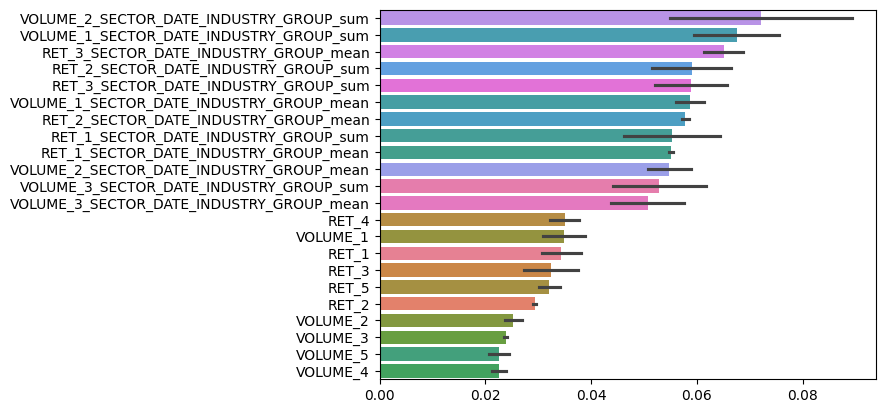

In [163]:
feature_importances = pd.DataFrame([model.feature_importances_ for model in models], columns=features)

sns.barplot(data=feature_importances, orient='h', order=feature_importances.mean().sort_values(ascending=False).index)

In [123]:
X_test = test[features]

rf_params['random_state'] = 0
model = RandomForestClassifier(**rf_params)
model.fit(X_train.fillna(0), y_train)
y_pred = model.predict_proba(X_test.fillna(0))[:, 1]

sub = test.copy()
sub['pred'] = y_pred
y_pred = sub.groupby('DATE')['pred'].transform(
    lambda x: x > x.median()).values

submission = pd.Series(y_pred)
submission.index = test.index
submission.name = target_feature

submission.to_csv('test.csv', index=True, header=True)